# Data Science Pipeline Fynch Smart Mobility

Wij proberen met onze pipeline te bewijzen of de volgende bewering juist of onjuist is:

**...**

De deelvragen die wij met onze pipeline proberen te beantwoorden zijn als volgt:

**...** 

**...**

**...**

# 1)Import Necessary Libraries

We importeren hier de tools die we nodig hebben voor het doorzoeken en analyseren van de data.
Pandas wordt bijvoorbeeld gebruikt voor het inlezen van de excel files.
Matplotlib wordt gebruiken we later om de data op verschillende manieren te visualiseren.

In [1]:
#data analysis libraries 
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 1000000)
pd.set_option('display.max_columns', 1000000)
pd.set_option('display.width', 1000)

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# 2)Read in and Explore the Data

Hier worden de bestanden ingeladen.
We maken voor het trainen van de machine (machine learning) gebruik van de aangeleverde data, We splitsen de datasets in tweeen om te kijken of beide sets dezelfde uitkomsten opleveren. Een train-set en een test-set.

Allereerst zullen we de Transaction data bekijken.

In [2]:
#import train and test CSV files
train = pd.read_csv("TransactionEvents-Train.csv")
test = pd.read_csv("TransactionEvents-Test.csv")

#remove the limit of collumn shown at the same time
pd.options.display.max_columns = None

#take a look at the training data
train.describe(include="all")

,AggDatePersonModalityId,EventType,AggStartDate,AggModality,AggDistanceMetres,AggCo2Grams,AggCo2GramsKm,AggFuelLiters,AggFuelLiters100Km,AggCarDamagesNumber,AggStandardFuelLiters100Km,AggTrafficFinesNumber,AggCustomizedConsumption,AggStandard_kWh_Consumption,MaskedUserId
count,29999.000000,29999,29999,29999,2.999900e+04,2.999900e+04,29999.000000,29999.0,29999.000000,29999.000000,29999.000000,29999.000000,29018.000000,29018.000000,29999
unique,NaN,1,10,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5539
top,NaN,TransactionEvent,2019-09-01,Car,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9FD663934CF20CD0CBA336A564A42CD1
freq,NaN,29999,5113,27804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
mean,497597.053602,NaN,NaN,NaN,1.503666e+06,3.179742e+05,228.957911,0.0,7.123995,0.009634,0.001407,0.034934,7.491666,0.062665,NaN
std,75578.987706,NaN,NaN,NaN,1.546335e+06,4.668926e+05,506.306644,0.0,4.959431,0.120034,0.108226,0.214436,4.226073,4.297915,NaN
min,110287.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,NaN
25%,507479.500000,NaN,NaN,NaN,4.290000e+05,6.836307e+04,63.000000,0.0,4.890000,0.000000,0.000000,0.000000,5.450000,-1.000000,NaN
50%,514979.000000,NaN,NaN,NaN,1.325000e+06,2.920159e+05,160.540000,0.0,6.510000,0.000000,0.000000,0.000000,6.610000,-1.000000,NaN
75%,524395.500000,NaN,NaN,NaN,2.210000e+06,4.732170e+05,278.000000,0.0,10.760000,0.000000,0.000000,0.000000,10.070000,-1.000000,NaN


# Data cleaning

We gaan nu de data opschonen zodat het makkelijker wordt om te gebruiken, en geen nutteloze velden bevat.

In [3]:
train["AggDistanceMetres"] = pd.to_numeric(train["AggDistanceMetres"],downcast='integer')
train = train[train.AggDistanceMetres != 0]
train = train[train.AggCo2Grams != 0]
train = train[np.isfinite(train['AggDistanceMetres'])]
train = train[np.isfinite(train['AggCo2Grams'])]

We verwijderen rijen die voor AggDistanceMetres of AggCo2Grams geen waarder bevatten. Met deze data kunnen we namelijk niets.

We maken van AggDistanceMetres een integer zodat er geen problemen mee ontstaan.

Data cleaning doen we na data analysis omdat we willen weten wat de data inhoud en wat er bruikbaar is voordat we de data gaan opschonen.

# Data exploration & analysis

We gaan nu de data nu analyseren, om bijvoorbeeld inzicht te krijgen in welke verschillende attributen de rijen hebben.
En om te zien hoe vaak deze attributen in de data voor komen.

In [4]:
#get a list of the features within the dataset
print(train.columns)

Index(['AggDatePersonModalityId', 'EventType', 'AggStartDate', 'AggModality', 'AggDistanceMetres', 'AggCo2Grams', 'AggCo2GramsKm', 'AggFuelLiters', 'AggFuelLiters100Km', 'AggCarDamagesNumber', 'AggStandardFuelLiters100Km', 'AggTrafficFinesNumber', 'AggCustomizedConsumption', 'AggStandard_kWh_Consumption', 'MaskedUserId'], dtype='object')


In [ ]:
#see a sample of the dataset to get an idea of the variables
train.sample(5)

,AggDatePersonModalityId,EventType,AggStartDate,AggModality,AggDistanceMetres,AggCo2Grams,AggCo2GramsKm,AggFuelLiters,AggFuelLiters100Km,AggCarDamagesNumber,AggStandardFuelLiters100Km,AggTrafficFinesNumber,AggCustomizedConsumption,AggStandard_kWh_Consumption,MaskedUserId
2609,509542,TransactionEvent,2019-02-01,Car,975000,354431.51,363.52,0,10.40,0,0.0,0,9.72,-1.0,4881FCEC200324B922CF7C268CCE5540
12369,514915,TransactionEvent,2019-07-01,Car,1290000,955216.20,740.48,0,15.41,0,0.0,0,12.40,-1.0,F7D9F793A663609A895254BE9680B2DF
15491,440629,TransactionEvent,2019-08-01,Car,2898000,369009.60,127.00,0,4.88,0,0.0,0,4.94,-1.0,F57330071DFAFE5513A6BEF85012FA5A
11875,513395,TransactionEvent,2019-07-01,Car,1839000,320978.87,174.54,0,10.55,0,0.0,0,11.39,-1.0,DEE1BC04224F19498EB330210708A5CD
16948,518750,TransactionEvent,2019-08-01,Car,1937000,691070.51,356.77,0,10.82,0,0.0,0,11.20,-1.0,9ADABF9345F51C52C0A8513BA2B375F8


    Numerical Features: AggModality, AggDistanceMetres, AggCo2Grams, AggCo2GramsKm, AggFuelLiters, AggFuelLiters100Km, AggCarDamagesNumber, AggStandardFuelLiters100Km, AggTrafficFinesNumber, AggCustomizedConsumption, AggStandard_kWh_Consumption
    Categorical Features: EventType, AggModality

Wat zijn de data types voor ieder attribuut?

    AggDatePersonModalityId: integer  	
    EventType: object 
    AggStartDate: object  	
    AggModality: object
    AggDistanceMetres: integer 	
    AggCo2Grams: float	
    AggCo2GramsKm: float 	
    AggFuelLiters: integer 	
    AggFuelLiters100Km: float
    AggCarDamagesNumber: integer	
    AggStandardFuelLiters100Km: float 	
    AggTrafficFinesNumber: float	
    AggCustomizedConsumption: object 	
    AggStandard_kWh_Consumption: object 	
    MaskedUserId: object

Nu we een overzicht hebben van alle attributen kunnen we een overzicht creeren van alle informatie die we over ze hebben.

In [ ]:
#see a summary of the training dataset
train.describe(include = "all")

,AggDatePersonModalityId,EventType,AggStartDate,AggModality,AggDistanceMetres,AggCo2Grams,AggCo2GramsKm,AggFuelLiters,AggFuelLiters100Km,AggCarDamagesNumber,AggStandardFuelLiters100Km,AggTrafficFinesNumber,AggCustomizedConsumption,AggStandard_kWh_Consumption,MaskedUserId
count,23067.000000,23067,23067,23067,2.306700e+04,2.306700e+04,23067.000000,23067.0,23067.000000,23067.000000,23067.000000,23067.000000,22508.000000,22508.000000,23067
unique,NaN,1,10,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4620
top,NaN,TransactionEvent,2019-10-01,Car,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89EABA2FDAEAD5CB05DDFF5C363D1181
freq,NaN,23067,3772,22662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
mean,503772.629904,NaN,NaN,NaN,1.919948e+06,4.074388e+05,297.763401,0.0,8.231716,0.010448,0.001829,0.041314,7.930525,-0.609241,NaN
std,66040.060643,NaN,NaN,NaN,1.520277e+06,2.843444e+05,559.372224,0.0,3.782425,0.119698,0.123418,0.232944,3.110576,2.652844,NaN
min,110287.000000,NaN,NaN,NaN,4.000000e+03,1.000000e+02,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,NaN
25%,508687.000000,NaN,NaN,NaN,1.044500e+06,2.381227e+05,140.115000,0.0,5.580000,0.000000,0.000000,0.000000,5.567500,-1.000000,NaN
50%,515557.000000,NaN,NaN,NaN,1.669000e+06,3.682813e+05,208.000000,0.0,7.280000,0.000000,0.000000,0.000000,7.010000,-1.000000,NaN
75%,524876.500000,NaN,NaN,NaN,2.493000e+06,5.285559e+05,314.520000,0.0,11.055000,0.000000,0.000000,0.000000,10.430000,-1.000000,NaN


Enige observaties:
- We zien dat het gaat om 29999 rijen gaat in totaal.
- Iedere rij heeft een EventType, maar niet iedere rij heeft een AggStartDate of AggModality.

In [ ]:
#check for any other unusable values
print(pd.isnull(train).sum())

AggDatePersonModalityId          0
EventType                        0
AggStartDate                     0
AggModality                      0
AggDistanceMetres                0
AggCo2Grams                      0
AggCo2GramsKm                    0
AggFuelLiters                    0
AggFuelLiters100Km               0
AggCarDamagesNumber              0
AggStandardFuelLiters100Km       0
AggTrafficFinesNumber            0
AggCustomizedConsumption       559
AggStandard_kWh_Consumption    559
MaskedUserId                     0
dtype: int64


Enige voorspellingen:

- AggDistanceMetres: Er wordt verwacht dat er een relatie bestaat tussen de afstand van een trip en het gekozen vervoersmiddel.
- PersonalTrip: Er wordt verwacht dat het gemiddelde gebruik van een bepaald vervoermiddel niet significant zal verschillen tussen PersonalTrip en Commuting per persoon.
- AggModality: Er wordt verwacht dat als iemand verder rijd (aggmodality=car) dat deze transaction ook vaker een boete bevat.
- AggDistanceMetres: Er wordt verwacht dat rows in Transactionevents waar geen AggDistanceMetres waarde in staat (0-waarde) geen relevante data is.

### AggModality

In [ ]:
train['Aggmodality'] = np.where(train.AggModality != 'Car', 'Other', train.AggModality)

#print average potential per country
print("Average distance for travel by car:", train["AggDistanceMetres"][train["AggModality"] == 'Car'].mean())

print("Average distance for non-car travel", train["AggDistanceMetres"][train["AggModality"] != 'Car'].mean())

Average distance for travel by car: 1920724.4913952872
Average distance for non-car travel 1876498.7654320989


We zien dus dat de afgelegde afstand met auto gemiddeld hoger is dan die van de andere vervoersmiddelen. Dit betekent dat de bewering: **"Er wordt verwacht dat er een relatie bestaat tussen de afstand van een trip en het gekozen vervoersmiddel."** juist is.

### Value

<IPython.core.display.Javascript object>


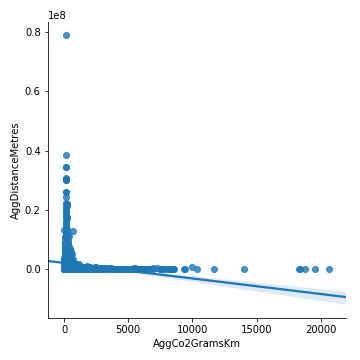

In [18]:
%matplotlib notebook
sns.lmplot(x="AggCo2GramsKm", y="AggDistanceMetres", data = train)

Lijnmatrix diagram van AggCo2GramsKm tegenover AggDistanceMetres.

### Position

<IPython.core.display.Javascript object>


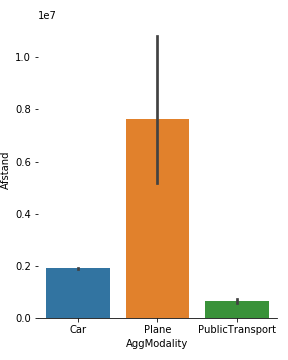

In [19]:
#Teken een staafdiagram van AggModality tegenover AggDistanceMetres
%matplotlib notebook
g = sns.catplot(x="AggModality", y="AggDistanceMetres", data=train, kind="bar")
g.despine(left=True)
g.set_ylabels("Afstand")
g.fig.set_figwidth(4)

## Testdata Opschonen

In [ ]:
#kijken welke kolommen we hebben in de testdata
test.describe(include="all")

,AggDatePersonModalityId,EventType,AggStartDate,AggModality,AggDistanceMetres,AggCo2Grams,AggCo2GramsKm,AggFuelLiters,AggFuelLiters100Km,AggCarDamagesNumber,AggStandardFuelLiters100Km,AggTrafficFinesNumber,AggCustomizedConsumption,AggStandard_kWh_Consumption,MaskedUserId
count,53235.000000,53235,53235,53235,5.323500e+04,5.323500e+04,53235.000000,53235.0,53235.000000,53235.000000,53235.000000,53235.000000,51880.000000,51880.000000,53235
unique,NaN,1,12,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6130
top,NaN,TransactionEvent,2020-01-01,Car,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FEB8EABA5FF8BF1474DEA0B0CB498D08
freq,NaN,53235,5434,45482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37
mean,512709.123453,NaN,NaN,NaN,1.265113e+06,2.500624e+05,250.167109,0.0,21.995881,0.014708,0.072180,0.022241,7.020602,27.804379,NaN
std,74672.224659,NaN,NaN,NaN,1.301688e+06,2.597736e+05,2072.776386,0.0,516.616383,0.133270,0.958262,0.199638,29.465096,682.738057,NaN
min,13174.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,NaN
25%,450203.500000,NaN,NaN,NaN,9.000000e+04,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,5.360000,-1.000000,NaN
50%,534961.000000,NaN,NaN,NaN,1.031000e+06,2.076192e+05,142.000000,0.0,6.150000,0.000000,0.000000,0.000000,5.990000,-1.000000,NaN
75%,555194.500000,NaN,NaN,NaN,1.957000e+06,3.937666e+05,246.000000,0.0,9.710000,0.000000,0.000000,0.000000,7.800000,-1.000000,NaN


In [ ]:
train.dtypes

AggDatePersonModalityId          int64
EventType                       object
AggStartDate                    object
AggModality                     object
AggDistanceMetres                int32
AggCo2Grams                    float64
AggCo2GramsKm                  float64
AggFuelLiters                    int64
AggFuelLiters100Km             float64
AggCarDamagesNumber              int64
AggStandardFuelLiters100Km     float64
AggTrafficFinesNumber            int64
AggCustomizedConsumption       float64
AggStandard_kWh_Consumption    float64
MaskedUserId                    object
Aggmodality                     object
dtype: object

In [ ]:
print(pd.isnull(test).sum())

AggDatePersonModalityId           0
EventType                         0
AggStartDate                      0
AggModality                       0
AggDistanceMetres                 0
AggCo2Grams                       0
AggCo2GramsKm                     0
AggFuelLiters                     0
AggFuelLiters100Km                0
AggCarDamagesNumber               0
AggStandardFuelLiters100Km        0
AggTrafficFinesNumber             0
AggCustomizedConsumption       1355
AggStandard_kWh_Consumption    1355
MaskedUserId                      0
dtype: int64


In [ ]:
print(pd.isnull(train).sum())

AggDatePersonModalityId          0
EventType                        0
AggStartDate                     0
AggModality                      0
AggDistanceMetres                0
AggCo2Grams                      0
AggCo2GramsKm                    0
AggFuelLiters                    0
AggFuelLiters100Km               0
AggCarDamagesNumber              0
AggStandardFuelLiters100Km       0
AggTrafficFinesNumber            0
AggCustomizedConsumption       559
AggStandard_kWh_Consumption    559
MaskedUserId                     0
Aggmodality                      0
dtype: int64


In [ ]:
#Het opgeschoonde
test


In [ ]:
train

In [ ]:
#Splitsen van de data
from sklearn.model_selection import train_test_split
columnsToBeDropped = ["","",""]
predictors = train.drop(columnsToBeDropped, axis=1)
target = train[""]
target=target.astype('')
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)


In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

In [ ]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

In [ ]:
# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_linear_svc)

In [ ]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_perceptron)

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

In [ ]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

In [ ]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)

In [ ]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

In [ ]:
#modellen vergelijken
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

ids = test['ID']
predictions = decisiontree.predict(test.drop(['ID','Position','Potential'], axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'ID' : ids, 'Potential': predictions })
output.to_csv('PotentialPrediction.csv', index=False)

# Communication

De oplevering van de data science pipeline staat niet op zichzelf. Je moet je data science pipeline netjes geannoteerd inleveren, zodat de naïeve lezer het verhaal dat je probeert te vertellen goed kan volgen. Je Jupyter Notebook bevat daarom ook zaken als:

een beschrijving van hoe het bouwen van de Data Science-pipeline is aangepakt (de manier waarop je te werk bent gegaan zegt iets over de betrouwbaarheid van je product);

een beschrijving van de methode van dataverzameling en -bewerking en de bronnen;

een beschrijving van de dataopbouw, de analyses en de betekenis van de resultaten;

beschrijvingen van de onderzoeksvragen, het antwoord op de onderzoeksvragen en een beargumenteerde conclusie.


# Conclusie

## Vraag 1

## Vraag 2

## Vraag 3

## Vraag 4